## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
bank_data = pd.read_csv('bank-full.csv')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Overview of Data

In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

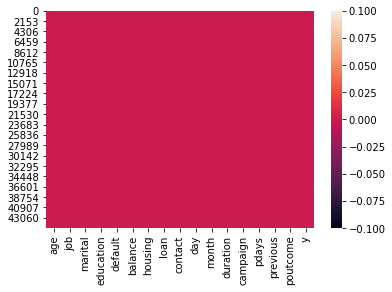

In [7]:
sns.heatmap(bank_data.isna())
plt.show()

* No null value found in the data

### Encoding object Datatypes

In [8]:
label_en = LabelEncoder()
for i in range(0, bank_data.shape[1]):
    if bank_data.dtypes[i] == 'object':
        bank_data[bank_data.columns[i]]=label_en.fit_transform(bank_data[bank_data.columns[i]])
        
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [9]:
bank_data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


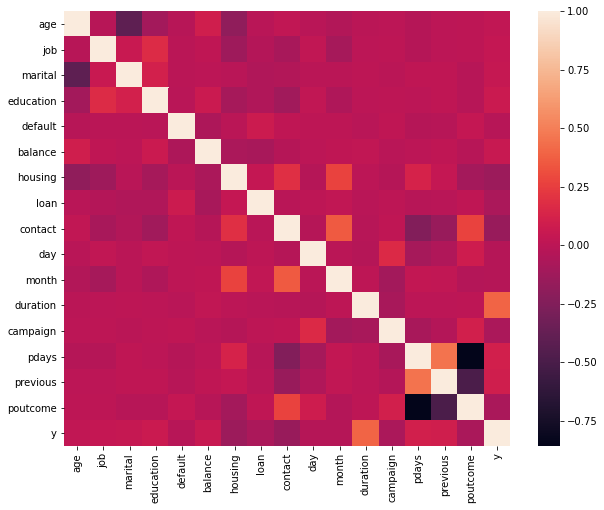

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_data.corr())
plt.show()

* 'poutcome' & 'pdays' found high -ve correlation with each other. So deleting any one of the the features (pdays).
* No other correlation found between the features.

In [11]:
bank_data.drop('pdays', axis = 1, inplace=True) 

In [12]:
bank_data.shape

(45211, 16)

### Normalizing data

In [13]:
scaler = MinMaxScaler()
bank_data_std = pd.DataFrame(scaler.fit_transform(bank_data), columns = bank_data.columns)

In [14]:
bank_data_std

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,1.000000,0.0


### Spltting data into features & labels

In [15]:
x = bank_data_std.iloc[:, :-1]
y = bank_data_std.iloc[:, -1]

### Preparing train-test data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=40)
print('x_train shape before resampling  : ' , x_train.shape)
print('y_train shape before resampling  : ' , y_train.shape)

x_train shape before resampling  :  (36168, 15)
y_train shape before resampling  :  (36168,)


In [17]:
y_train.value_counts()

0.0    31937
1.0     4231
Name: y, dtype: int64

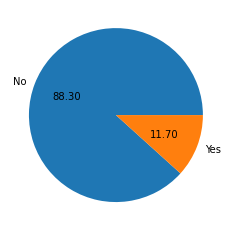

In [18]:
plt.pie(y_train.value_counts(), labels=['No', 'Yes'], autopct='%0.2f')
plt.show()

##### --> Data is imbalanced. 

## Building Model with imbalanced data

In [19]:
model=LogisticRegression(random_state=40)
model.fit(x_train, y_train)

LogisticRegression(random_state=40)

### Model evaluation with train data

In [20]:
y_train_pred = model.predict(x_train)
print('Accuracy score of Trained data : ', round(accuracy_score(y_train, y_train_pred), 4))

Accuracy score of Trained data :  0.8885


In [21]:
print(confusion_matrix(y_train, y_train_pred))

[[31419   518]
 [ 3513   718]]


In [22]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     31937
         1.0       0.58      0.17      0.26      4231

    accuracy                           0.89     36168
   macro avg       0.74      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



### Model validation with test data

In [23]:
pred = model.predict(x_test)
print('Accuracy Score of Tested data : ' , round(accuracy_score(y_test, pred), 4))

Accuracy Score of Tested data :  0.8928


In [24]:
print(confusion_matrix(y_test, pred))

[[7859  126]
 [ 843  215]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7985
         1.0       0.63      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



* Accuracy is 89% after validating with the test data which very good. But, the recall value is very low i.e. 20% for '1', which showing bias in nature.
* We have to balance the trained data to remove the bias nature of the model.

## Handling imbalanced train data (SMOTE)

In [26]:
sm = SMOTE(random_state=40)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [27]:
print('x_train shape after resampling  : ' , x_train_res.shape)
print('y_train shape after resampling  : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train shape after resampling  :  (63874, 15)
y_train shape after resampling  :  (63874,)
0.0    31937
1.0    31937
Name: y, dtype: int64


## Building model with balanced data

In [28]:
model_final=LogisticRegression(random_state=40)
model_final.fit(x_train_res, y_train_res)

LogisticRegression(random_state=40)

### Model Evaluation with balanced train data

In [29]:
y_train_pred_1 = model_final.predict(x_train_res)
print('Accuracy score of Trained data : ', round(accuracy_score(y_train_res, y_train_pred_1), 4))

Accuracy score of Trained data :  0.8183


In [30]:
print(confusion_matrix(y_train_res, y_train_pred_1))

[[25955  5982]
 [ 5624 26313]]


In [31]:
print(classification_report(y_train_res, y_train_pred_1))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82     31937
         1.0       0.81      0.82      0.82     31937

    accuracy                           0.82     63874
   macro avg       0.82      0.82      0.82     63874
weighted avg       0.82      0.82      0.82     63874



In [32]:
# [:,1] Threshold value>0.5 = 1 , else [:,0] Threshold value<0.5 = 0 
model_final.predict_proba(x_train_res)[:,1]

array([0.03771743, 0.39678978, 0.33803998, ..., 0.85513909, 0.74880203,
       0.9339778 ])

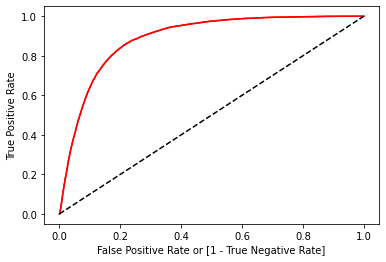

auc accuracy: 0.8183


In [33]:
fpr,tpr,thresholds=roc_curve(y_train_res,model_final.predict_proba(x_train_res)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_train_res,y_train_pred_1)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',round(auc, 4))

### Model validation with test data

In [34]:
pred_test = model_final.predict(x_test)
print('Accuracy Score of Tested data : ' , round(accuracy_score(y_test, pred_test), 4))

Accuracy Score of Tested data :  0.8101


In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      7985
         1.0       0.36      0.79      0.49      1058

    accuracy                           0.81      9043
   macro avg       0.66      0.80      0.69      9043
weighted avg       0.90      0.81      0.84      9043



## Conclusion

* The final model is used in production since the recall values 7 accuracy of final model are high.